Project 1: Writing a Data Scientist Blog Post

Boston Airbnb Data

Import required packages:

In [4397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import zipfile
%matplotlib inline

Get familiar with the contents of the calendar file.

In [4398]:
# Open calendar data file
calendar_path = r"C:\Users\emma1\Project_1_Data-Science-Blog\Boston Airbnb Open Data\calendar.csv"
calendar = pd.read_csv(calendar_path)
# View top five rows
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4399]:
# How big is the dataset?
calendar.shape # 4 columns : 1,308,890 rows of data

(1308890, 4)

In [4400]:
# What data types are included in this dataset?
calendar.dtypes # Why is price listed as an object?

listing_id     int64
date          object
available     object
price         object
dtype: object

In [4401]:
# Count null values
calendar.isnull().sum() # 665,853 null values in price column

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [4402]:
# Determine proportion of null values
calendar.isnull().mean() # 50.8716% null values in price column

listing_id    0.000000
date          0.000000
available     0.000000
price         0.508716
dtype: float64

In [4403]:
# Look at descriptive statistics for each field
calendar.describe(include='all') # statistics not very useful - only listing_id is an int field, others are object fields

,listing_id,date,available,price
count,1.308890e+06,1308890,1308890,643037
unique,NaN,365,2,1246
top,NaN,2016-09-06,f,$150.00
freq,NaN,3586,665853,20752
mean,8.442118e+06,NaN,NaN,NaN
std,4.500149e+06,NaN,NaN,NaN
min,3.353000e+03,NaN,NaN,NaN
25%,4.679319e+06,NaN,NaN,NaN
50%,8.578710e+06,NaN,NaN,NaN
75%,1.279603e+07,NaN,NaN,NaN


Clean up calendar file.

In [4404]:
# Change date field from object to datetime
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.dtypes # confirm change was successful

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [4405]:
# price field has object dtype due to $ character
# Remove $ from beginning of each string
calendar['price'] = calendar['price'].str.replace("$", "")
calendar['price'].value_counts()

price
150.00      20752
65.00       17518
75.00       16249
100.00      15499
200.00      14326
            ...  
1,056.00        1
1,381.00        1
1,707.00        1
2,080.00        1
1,810.00        1
Name: count, Length: 1246, dtype: int64

In [4406]:
# Convert price field to numeric
calendar['price'] = pd.to_numeric(calendar['price'], errors= "coerce")
calendar.dtypes # confirm change was successful

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

Visualize the cleaned calendar data.

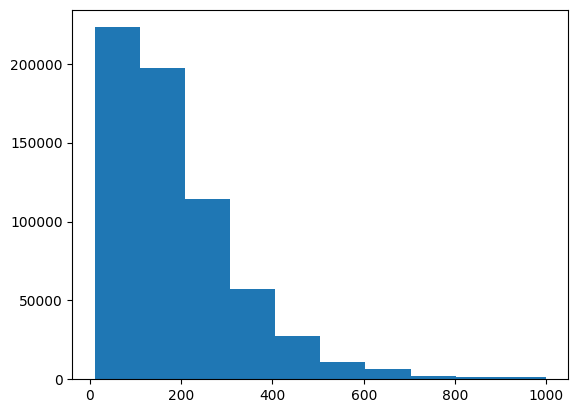

In [4407]:
plt.hist(calendar['price']);
# right skewed distribution

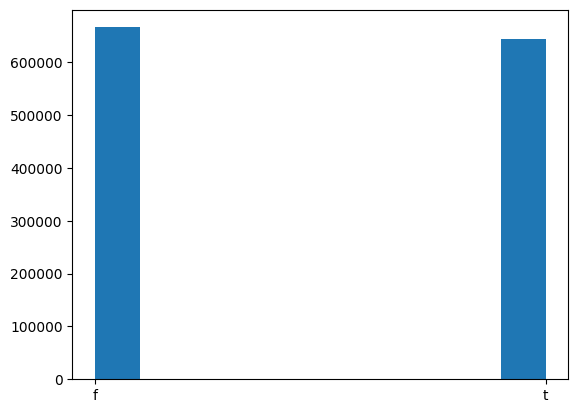

In [4408]:
plt.hist(calendar['available']);
# Fairly equal distribution of T and F values

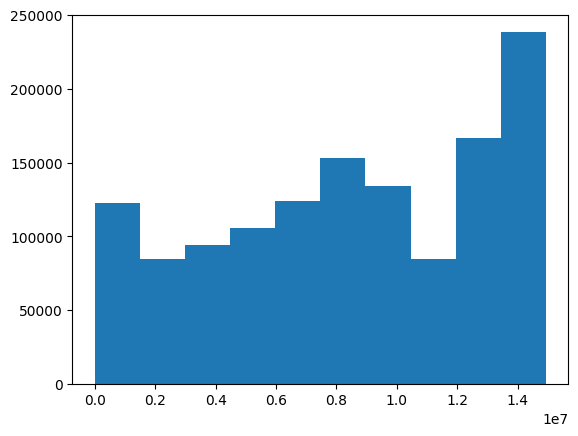

In [4409]:
plt.hist(calendar['listing_id']);
# can't determine much from this distribution

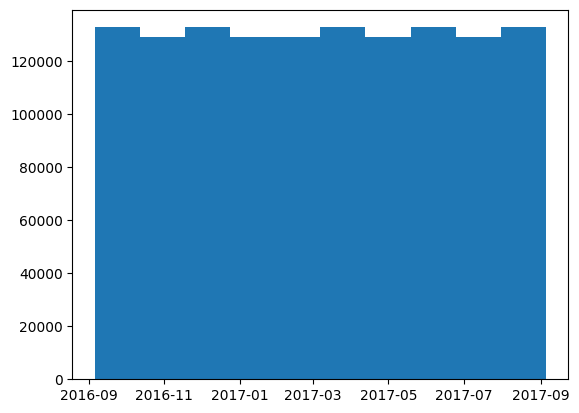

In [4410]:
plt.hist(calendar['date']);
# not helpful at all

Question 1: How does seasonal variation impact Boston AirBnB booking prices?

In [4411]:
# use calendar dataset
# extract month and year from 'date' column and store as new columns
calendar['month'] = calendar['date'].dt.month
calendar['year'] = calendar['date'].dt.year
calendar.head()

,listing_id,date,available,price,month,year
0,12147973,2017-09-05,f,NaN,9,2017
1,12147973,2017-09-04,f,NaN,9,2017
2,12147973,2017-09-03,f,NaN,9,2017
3,12147973,2017-09-02,f,NaN,9,2017
4,12147973,2017-09-01,f,NaN,9,2017


In [4412]:
calendar.isnull().mean()
# 51% of the price values are null

listing_id    0.000000
date          0.000000
available     0.000000
price         0.510678
month         0.000000
year          0.000000
dtype: float64

In [4413]:
# filter out available AirBnBs so that we're only looking at booked records
calendar_booked = calendar[calendar['available'] == 'f']
calendar_booked.head()

,listing_id,date,available,price,month,year
0,12147973,2017-09-05,f,NaN,9,2017
1,12147973,2017-09-04,f,NaN,9,2017
2,12147973,2017-09-03,f,NaN,9,2017
3,12147973,2017-09-02,f,NaN,9,2017
4,12147973,2017-09-01,f,NaN,9,2017


In [4414]:
calendar_booked.isnull().mean()
# 100% of price values are null for records where available = f
# this makes sense because the property is unavailable, so there is no price to rent

listing_id    0.0
date          0.0
available     0.0
price         1.0
month         0.0
year          0.0
dtype: float64

In [4415]:
calendar_available = calendar[calendar['available'] == 't']
calendar_available.head()

,listing_id,date,available,price,month,year
365,3075044,2017-08-22,t,65.0,8,2017
366,3075044,2017-08-21,t,65.0,8,2017
367,3075044,2017-08-20,t,65.0,8,2017
368,3075044,2017-08-19,t,75.0,8,2017
369,3075044,2017-08-18,t,75.0,8,2017


In [4416]:
calendar_available.isnull().mean()
# only 0.3% of price values are null for dates when the property is available
calendar_available.isnull().sum()


listing_id       0
date             0
available        0
price         2568
month            0
year             0
dtype: int64

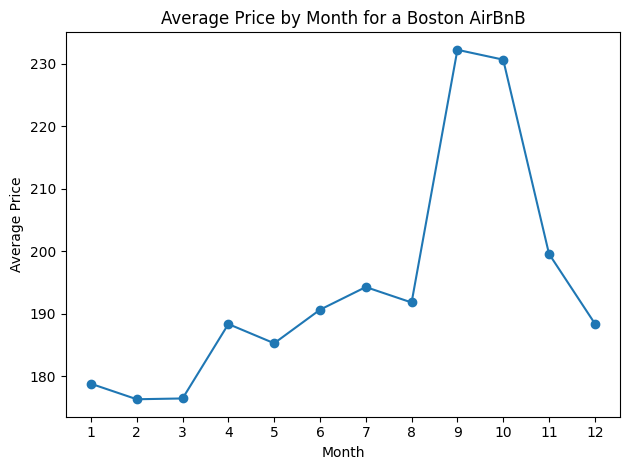

In [4417]:
# plot the average price by month
mean_monthly_price = calendar.groupby('month')['price'].mean().reset_index()
plt.plot(mean_monthly_price['month'], mean_monthly_price['price'], marker = 'o')
plt.title('Average Price by Month for a Boston AirBnB')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(np.arange(1, 13, 1))
plt.tight_layout()
plt.show()
# highest average prices are in september and october, respectively

Get familiar with the listings dataframe. 

In [4418]:
# Open listings data file
listings_path = r"C:\Users\emma1\Project_1_Data-Science-Blog\Boston Airbnb Open Data\listings.csv"
listings = pd.read_csv(listings_path)
# View top five rows
print(listings.head()) # lots of data here

         id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a 

In [4419]:
# How big is this dataset?
listings.shape # 95 columns : 3,585 rows

(3585, 95)

In [4420]:
listings.columns # look at column names

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [4421]:
listings.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3585,3.585000e+03,3585,3585,3442,2528,3585,3585,2170,...,2764.000000,3585,0.0,0.0,3585,3585,3585,3585,3585.000000,2829.000000
unique,NaN,3585,NaN,1,3504,3113,2268,3423,1,1728,...,NaN,1,NaN,NaN,2,4,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/14504422,NaN,2016-09-07,Lux 2BR by Fenway w/WiFi,"The unit is stylishly designed for comfort, va...",The studio's kitchenette comes equipped with a...,Private room in a HOSTEL exclusive for Airbnb ...,none,Conveniently bordering the neighborhoods of th...,...,NaN,f,NaN,NaN,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3585,8,21,17,7,3585,21,...,NaN,3585,NaN,NaN,2991,1582,3518,3348,NaN,NaN
mean,8.440875e+06,NaN,2.016091e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.168234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.733891,1.970908
std,4.500787e+06,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.011116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.415076,2.120561
min,3.353000e+03,NaN,2.016091e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,NaN,2.016091e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,NaN,2.016091e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,NaN,2.016091e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2.720000


In [4422]:
# How many nulls? What proportion of nulls? What are the column types?
for column in listings.columns:
    num_null = listings[column].isnull().sum()
    prop_null = listings[column].isnull().mean()
    col_type = listings[column].dtype
    print(column + ":" + str(num_null) + "," + str(prop_null) + "," + str(col_type))

id:0,0.0,int64
listing_url:0,0.0,object
scrape_id:0,0.0,int64
last_scraped:0,0.0,object
name:0,0.0,object
summary:143,0.039888423988842396,object
space:1057,0.29483960948396093,object
description:0,0.0,object
experiences_offered:0,0.0,object
neighborhood_overview:1415,0.3947001394700139,object
notes:1975,0.5509065550906556,object
transit:1290,0.3598326359832636,object
access:1489,0.41534170153417016,object
interaction:1554,0.43347280334728033,object
house_rules:1192,0.33249651324965135,object
thumbnail_url:599,0.16708507670850767,object
medium_url:599,0.16708507670850767,object
picture_url:0,0.0,object
xl_picture_url:599,0.16708507670850767,object
host_id:0,0.0,int64
host_url:0,0.0,object
host_name:0,0.0,object
host_since:0,0.0,object
host_location:11,0.0030683403068340305,object
host_about:1309,0.36513249651324964,object
host_response_time:471,0.13138075313807532,object
host_response_rate:471,0.13138075313807532,object
host_acceptance_rate:471,0.13138075313807532,object
host_is_superh

Filter down the listings dataframe. 

In [4423]:
# Drop columns not used in analysis:
    # text-heavy columns (not sure how to clean these up for this analysis)
    # URL columns
    # location columns: latitude, longitude, street, is_location_exact
    # columns with only one value: country (United States), country_code (US), state (MA), last_scraped (2016-09-07), 
        # calendar_last_scraped (2016-09-06), scrape_id (20160906204935), experiences_offered (None)
    # columns with similar info: city, zipcode, smart_location, neighbourhood; keep neighbourhood_cleansed
    # columns with only null values: jurisdiction_names, has_availability, neighbourhood_group_cleansed, license
print(listings[['country', 'country_code', 'state', 'market', 'last_scraped', 'calendar_last_scraped', 
                  'experiences_offered']].value_counts())
print(listings[['jurisdiction_names', 'has_availability', 'neighbourhood_group_cleansed', 
                   'license']].isnull().mean())

listings_filtered = listings.drop(['description', 'summary', 'space', 'neighborhood_overview', 'notes', 
                                   'transit', 'access', 'interaction', 'house_rules', 'host_about', 
                                   'name', 'host_name', 'host_verifications', 
                                   'host_thumbnail_url', 'listing_url', 'thumbnail_url', 'host_url', 
                                   'host_picture_url', 'medium_url', 'picture_url', 'xl_picture_url',
                                   'latitude', 'longitude', 'country', 'country_code', 'street', 'state', 
                                   'market', 'neighbourhood', 'smart_location', 'is_location_exact', 'city', 
                                   'zipcode', 'jurisdiction_names', 'last_scraped', 'calendar_last_scraped', 
                                   'scrape_id', 'experiences_offered', 'host_id', 'has_availability', 
                                   'neighbourhood_group_cleansed', 'license', 'host_location',
                                   'host_neighbourhood'], axis = 1)
listings_filtered.head() # confirm data looks as expected

country        country_code  state  market                 last_scraped  calendar_last_scraped  experiences_offered
United States  US            MA     Boston                 2016-09-07    2016-09-06             none                   3568
                                    Other (Domestic)       2016-09-07    2016-09-06             none                      1
                                    Other (International)  2016-09-07    2016-09-06             none                      1
                                    San Francisco          2016-09-07    2016-09-06             none                      1
Name: count, dtype: int64
jurisdiction_names              1.0
has_availability                1.0
neighbourhood_group_cleansed    1.0
license                         1.0
dtype: float64


,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,2015-04-15,NaN,NaN,NaN,f,1,1,t,f,...,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,3075044,2012-06-07,within an hour,100%,100%,f,1,1,t,t,...,10.0,9.0,9.0,f,t,moderate,f,f,1,1.30
2,6976,2009-05-11,within a few hours,100%,88%,t,1,1,t,t,...,10.0,9.0,10.0,f,f,moderate,t,f,1,0.47
3,1436513,2013-04-21,within a few hours,100%,50%,f,1,1,t,f,...,10.0,10.0,10.0,f,f,moderate,f,f,1,1.00
4,7651065,2014-05-11,within an hour,100%,100%,t,1,1,t,t,...,10.0,9.0,10.0,f,f,flexible,f,f,1,2.25


In [4424]:
# Let's recheck:
# How many nulls? What proportion of nulls? What are the column types?
for column in listings_filtered.columns:
    num_null = listings_filtered[column].isnull().sum()
    prop_null = listings_filtered[column].isnull().mean()
    col_type = listings_filtered[column].dtype
    print(column + ":" + str(num_null) + "," + str(prop_null) + "," + str(col_type))

id:0,0.0,int64
host_since:0,0.0,object
host_response_time:471,0.13138075313807532,object
host_response_rate:471,0.13138075313807532,object
host_acceptance_rate:471,0.13138075313807532,object
host_is_superhost:0,0.0,object
host_listings_count:0,0.0,int64
host_total_listings_count:0,0.0,int64
host_has_profile_pic:0,0.0,object
host_identity_verified:0,0.0,object
neighbourhood_cleansed:0,0.0,object
property_type:3,0.0008368200836820083,object
room_type:0,0.0,object
accommodates:0,0.0,int64
bathrooms:14,0.003905160390516039,float64
bedrooms:10,0.002789400278940028,float64
beds:9,0.002510460251046025,float64
bed_type:0,0.0,object
amenities:0,0.0,object
square_feet:3529,0.9843793584379359,float64
price:0,0.0,object
weekly_price:2693,0.7511854951185495,object
monthly_price:2697,0.7523012552301255,object
security_deposit:2243,0.6256624825662482,object
cleaning_fee:1107,0.3087866108786611,object
guests_included:0,0.0,int64
extra_people:0,0.0,object
minimum_nights:0,0.0,int64
maximum_nights:0,0.0

Clean up data types in the listings dataframe.

In [4425]:
# Why are price fields considered object type? Let's fix this.
listings_filtered[['price', 'extra_people', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']].head()

,price,extra_people,weekly_price,monthly_price,security_deposit,cleaning_fee
0,$250.00,$0.00,NaN,NaN,NaN,$35.00
1,$65.00,$0.00,$400.00,NaN,$95.00,$10.00
2,$65.00,$20.00,$395.00,"$1,350.00",NaN,NaN
3,$75.00,$25.00,NaN,NaN,$100.00,$50.00
4,$79.00,$0.00,NaN,NaN,NaN,$15.00


In [4426]:
# price field has object dtype due to $ character
# Remove $ from beginning of each string
listings_filtered['weekly_price'] = listings_filtered['weekly_price'].str.replace("$", "")
listings_filtered['monthly_price'] = listings_filtered['monthly_price'].str.replace("$", "")
listings_filtered['security_deposit'] = listings_filtered['security_deposit'].str.replace("$", "")
listings_filtered['cleaning_fee'] = listings_filtered['cleaning_fee'].str.replace("$", "")
listings_filtered['extra_people'] = listings_filtered['extra_people'].str.replace("$", "")
listings_filtered['price'] = listings_filtered['price'].str.replace("$", "")

listings_filtered[['weekly_price', 'monthly_price', 'security_deposit', 
                   'cleaning_fee', 'extra_people', 'price']].head() # confirm changes worked correctly

,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,price
0,NaN,NaN,NaN,35.00,0.00,250.00
1,400.00,NaN,95.00,10.00,0.00,65.00
2,395.00,"1,350.00",NaN,NaN,20.00,65.00
3,NaN,NaN,100.00,50.00,25.00,75.00
4,NaN,NaN,NaN,15.00,0.00,79.00


In [4427]:
# Why are host_response_rate and host_acceptance_rate object type?
print(listings_filtered[['host_response_rate', 'host_acceptance_rate']].head())

# object dtype due to % character --> remove % from end of each string
listings_filtered['host_response_rate'] = listings_filtered['host_response_rate'].str.replace("%", "")
listings_filtered['host_acceptance_rate'] = listings_filtered['host_acceptance_rate'].str.replace("%", "")

print(listings_filtered[['host_response_rate', 'host_acceptance_rate']].head()) # confirm changes were successful

  host_response_rate host_acceptance_rate
0                NaN                  NaN
1               100%                 100%
2               100%                  88%
3               100%                  50%
4               100%                 100%
  host_response_rate host_acceptance_rate
0                NaN                  NaN
1                100                  100
2                100                   88
3                100                   50
4                100                  100


In [4428]:
# Convert price and fee fields to numeric type
listings_filtered['weekly_price'] = pd.to_numeric(listings_filtered['weekly_price'], errors= "coerce")
listings_filtered['monthly_price'] = pd.to_numeric(listings_filtered['monthly_price'], errors= "coerce")
listings_filtered['security_deposit'] = pd.to_numeric(listings_filtered['security_deposit'], errors= "coerce")
listings_filtered['cleaning_fee'] = pd.to_numeric(listings_filtered['cleaning_fee'], errors= "coerce")
listings_filtered['extra_people'] = pd.to_numeric(listings_filtered['extra_people'], errors= "coerce")
listings_filtered['price'] = pd.to_numeric(listings_filtered['price'], errors= "coerce")


# Convert host_response_rate and host_acceptance_rate to numeric type
listings_filtered['host_response_rate'] = pd.to_numeric(listings_filtered['host_response_rate'], errors= "coerce")
listings_filtered['host_acceptance_rate'] = pd.to_numeric(listings_filtered['host_acceptance_rate'], errors= "coerce")


listings_filtered.dtypes # confirm changes were successful

id                                    int64
host_since                           object
host_response_time                   object
host_response_rate                  float64
host_acceptance_rate                float64
host_is_superhost                    object
host_listings_count                   int64
host_total_listings_count             int64
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                            object
square_feet                         float64
price                               float64
weekly_price                        float64
monthly_price                   

In [4429]:
# Post-filtering and cleaning: How many nulls? What proportion of nulls? What are the column types?
for column in listings_filtered.columns:
    num_null = listings_filtered[column].isnull().sum()
    prop_null = listings_filtered[column].isnull().mean()
    col_type = listings_filtered[column].dtype
    if num_null > 0:
        print(column + ":" + str(num_null) + "," + str(prop_null) + "," + str(col_type))
    else:
        continue

host_response_time:471,0.13138075313807532,object
host_response_rate:471,0.13138075313807532,float64
host_acceptance_rate:471,0.13138075313807532,float64
property_type:3,0.0008368200836820083,object
bathrooms:14,0.003905160390516039,float64
bedrooms:10,0.002789400278940028,float64
beds:9,0.002510460251046025,float64
square_feet:3529,0.9843793584379359,float64
price:12,0.0033472803347280333,float64
weekly_price:3009,0.8393305439330544,float64
monthly_price:3541,0.9877266387726639,float64
security_deposit:2317,0.6463040446304045,float64
cleaning_fee:1107,0.3087866108786611,float64
first_review:756,0.2108786610878661,object
last_review:756,0.2108786610878661,object
review_scores_rating:813,0.22677824267782426,float64
review_scores_accuracy:823,0.2295676429567643,float64
review_scores_cleanliness:818,0.22817294281729428,float64
review_scores_checkin:820,0.22873082287308227,float64
review_scores_communication:818,0.22817294281729428,float64
review_scores_location:822,0.2292887029288703,floa

Question 2: What are the most popular amenities for Boston AirBnB properties?

In [4430]:
freq = []
for s in listings_filtered['amenities']:
    new_list = s[1:-1].replace('"', '').split(',')
    freq = freq + new_list

df = pd.DataFrame({'data': freq})
freq_table = df['data'].value_counts()
amenities = pd.DataFrame(freq_table)
amenities

,count
data,
Wireless Internet,3421
Heating,3384
Kitchen,3284
Essentials,2994
Smoke Detector,2911
Air Conditioning,2821
TV,2607
Internet,2577
Dryer,2476


In [4431]:
amenities_clean = amenities.drop(['', 'translation missing: en.hosting_amenity_50', 'translation missing: en.hosting_amenity_49'], axis=0)

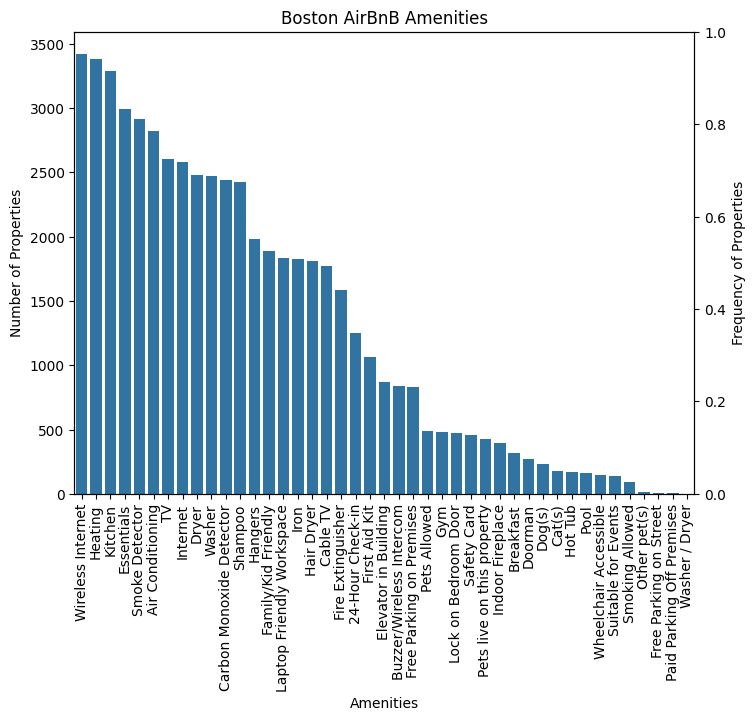

In [4432]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='data', y='count', data=amenities_clean)
plt.xlabel('Amenities')
plt.ylabel('Number of Properties')
plt.title('Boston AirBnB Amenities')
plt.xticks(rotation = 90)

ax2=ax.twinx()
ax2.set_ylabel('Frequency of Properties')

plt.show()

Question 3: Which neighborhood has the most AirBnB properties? Correlation b/w price and number of properties in that area. 

In [4433]:
mean_neighborhood = listings_filtered.groupby(by='neighbourhood_cleansed').mean('price').sort_values(by='price', ascending=False)
mean_neighborhood

,id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
neighbourhood_cleansed,,,,,,,,,,,,,,,,,,,,,
Bay Village,9.089334e+06,95.260870,84.652174,39.625000,39.625000,3.541667,1.458333,1.458333,1.833333,2000.000000,...,10.041667,93.000000,9.312500,9.250000,9.750000,9.812500,9.937500,9.125000,8.958333,1.617500
South Boston Waterfront,1.056695e+07,94.826667,75.640000,175.843373,175.843373,3.686747,1.445783,1.373494,1.807229,0.000000,...,8.963855,94.431034,9.568966,9.689655,9.603448,9.637931,9.689655,9.224138,33.265060,1.865690
Leather District,7.293484e+06,100.000000,87.500000,1.800000,1.800000,2.800000,1.200000,1.400000,1.800000,NaN,...,13.800000,98.333333,10.000000,10.000000,10.000000,10.000000,9.333333,9.666667,1.800000,1.666667
Back Bay,8.012314e+06,94.811321,77.501887,109.698675,109.698675,3.251656,1.168874,1.110368,1.536424,810.000000,...,14.533113,91.531646,9.334746,9.309322,9.555085,9.555085,9.949153,9.123404,20.897351,1.603992
Downtown,8.841361e+06,95.587413,79.076923,107.720930,107.720930,3.639535,1.247093,1.232558,1.697674,1200.000000,...,14.738372,92.432203,9.347458,9.406780,9.550847,9.533898,9.694915,9.152542,17.825581,1.988537
Chinatown,9.832464e+06,96.000000,70.449275,340.000000,340.000000,3.732394,1.316901,1.450704,1.732394,NaN,...,9.422535,92.121951,9.365854,9.365854,9.439024,9.560976,9.292683,9.121951,60.338028,1.634390
Beacon Hill,8.095280e+06,95.450867,84.618497,13.144330,13.144330,2.850515,1.113402,1.072539,1.484536,490.000000,...,21.123711,93.378698,9.446429,9.327381,9.779762,9.750000,9.934524,9.244048,7.469072,2.002529
West End,7.954782e+06,96.282609,62.891304,393.571429,393.571429,3.857143,1.459184,1.530612,1.836735,925.000000,...,3.204082,90.333333,8.925926,9.111111,8.962963,8.925926,9.666667,8.814815,66.571429,0.642963
South End,7.690170e+06,95.438849,82.755396,38.512270,38.512270,2.886503,1.141975,1.084375,1.432515,598.571429,...,17.527607,93.264925,9.520446,9.486989,9.717472,9.713755,9.720149,9.263941,11.745399,1.580000


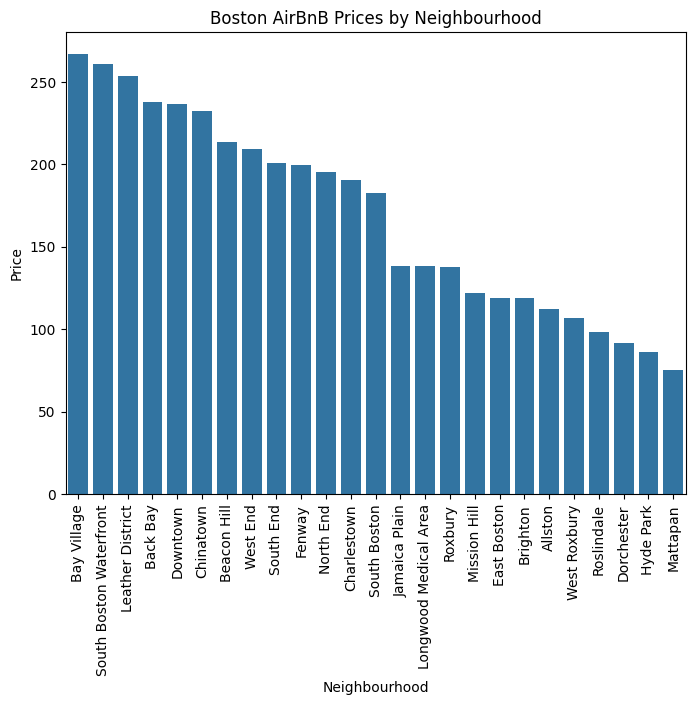

In [4434]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='neighbourhood_cleansed', y='price', data=mean_neighborhood)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Boston AirBnB Average Prices by Neighbourhood')
plt.xticks(rotation = 90)

plt.show()

Get familiar with reviews file.

In [ ]:
# Import reviews dataset
reviews_path = r"C:\Users\emma1\Project_1_Data-Science-Blog\Boston Airbnb Open Data\reviews.csv"
reviews = pd.read_csv(reviews_path)

# View top five rows
print(reviews.head())

In [ ]:
# How big is this dataset?
reviews.shape # 6 columns : 68,275 rows

In [ ]:
reviews.value_counts()

In [ ]:
reviews.isnull().mean()
reviews.isnull().sum()
# 53 rows missing comments - no way to impute values

In [ ]:
reviews['reviewer_id'].value_counts()
# not sure what to do with this information...looks like the listings file will be more useful for modeling